# Brazilian E-Commerce Public Dataset

## Exploratory Data Analysis(EDA):
Welcome! This Jupyter notebook is a part of my personal projects. I have used Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

## Introduction
In this kernel, we would like to analyze Brazilian E-Commerce Public Dataset by Olist, step by step.

We've tried to extract information from the 'customer side' and convert them to observations. By analysing how different factors influence purchasing decisions.

## Data Preparation

Importing the required libraries for EDA
Below are the libraries that are used in order to perform EDA (Exploratory data analysis).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype

## Loading the data

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")


## Data Cleaning
- Showing a summary of datasets in one table.
- Checking missing values for each column
- Using dropna() to remove rows with Null/NaN values.

In [3]:
datasets = [customers, items, payments, orders, products, category_translation]
titles = ["customers", "items", "payments", "orders", "products", "category_translation"]

#To gather practical information about all datasets 
info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_translation,"product_category_name, product_category_name_english",2,0,0,


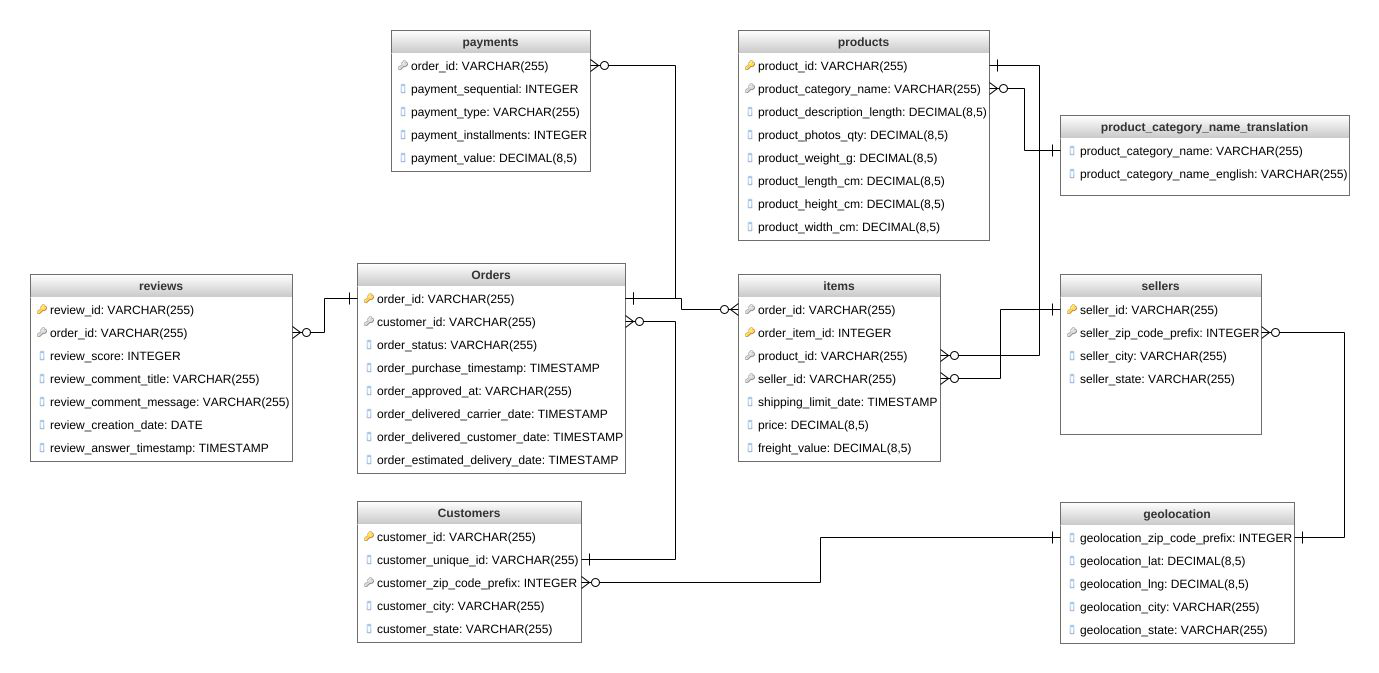

In [4]:
from PIL import Image
img = Image.open('data model.jpeg')
img

As shown in the Data Model, the datasets that used in this project, can be merged. Creating one dataset which includes all the columns would be very efficient in this task.

In [5]:
df = pd.merge(orders,payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(category_translation, on="product_category_name")

df.dropna(inplace=True)  #Keep the DataFrame with valid entries in the same variable

df.info()
df.isnull().sum().sort_values()  # To get the number of missing value in each row if there is still any. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   payment_sequential             113367 non-null  int64  
 9   payment_type                   113367 non-null  object 
 10  payment_installments           113367 non-null  int64  
 11  payment_value                  113367 non-null  float64
 12  customer_unique_id            

order_id                         0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_lenght       0
product_name_lenght              0
product_category_name            0
freight_value                    0
price                            0
shipping_limit_date              0
seller_id                        0
product_id                       0
order_item_id                    0
product_width_cm                 0
customer_state                   0
customer_zip_code_prefix         0
customer_unique_id               0
payment_value                    0
payment_installments             0
payment_type                     0
payment_sequential               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id         

In [6]:
df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,...,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,...,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares
7,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,...,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares
8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,...,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares
9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,...,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares



## Questions:
**1. How e_commerce has evolved over time in Brazil?**

**2. Highest Monthly sales over 3 years?**

**3. On what days of week brazilians customers tend to do online shopping?**

**4. Which are top 10 categories?**

**5. What is average price on each product category?**

**6. What is average price of top 10 categories?**

**7. How many payment methods are available? and which one is the most popular?**

**8. How customers are distributed over the states?**

**9 . Which state has longest and shortest delivery time?**

***

### **1. How e_commerce has evolved over time in Brazil?**

Text(0.5, 1.0, 'Years')

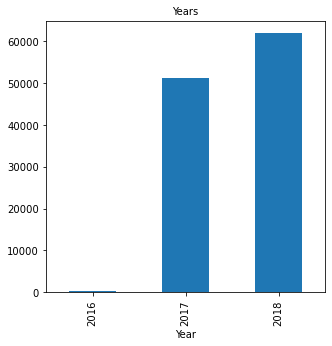

In [7]:
#'order_purchase_timestamp' and 'order_delivered_customer_date' are object 
df[['order_purchase_timestamp', 'order_delivered_customer_date']]=df[['order_purchase_timestamp', \
                                                                      'order_delivered_customer_date']].apply(pd.to_datetime)

# To extract "year" from date. 
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'bar',
    figsize=(5,5),  
)
plt.title('Years',fontsize=10)

**A.: It can be clearly seen from the above bar graph that there was a major change occured in the e-commerce market of Brazil after 2016.**

----

### 2. Highest Monthly sales over 3 years?

Text(0.5, 1.0, 'Months')

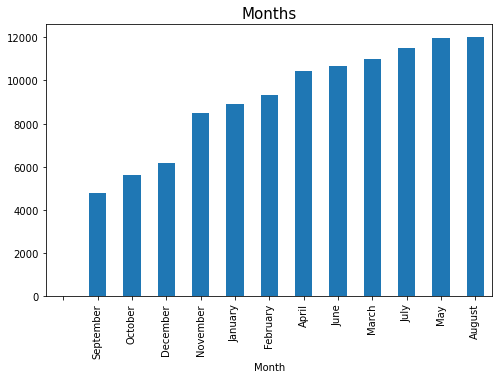

In [8]:
df['Month'] =  pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
df.groupby('Month').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)
plt.title('Months',fontsize=15)

**A. : It can be clearly seen that Nov 2017 is the highest sales months over the period of 3 years.**

----

### **3. On what days of week brazilians customers tend to do online shopping?**

<AxesSubplot:xlabel='Day'>

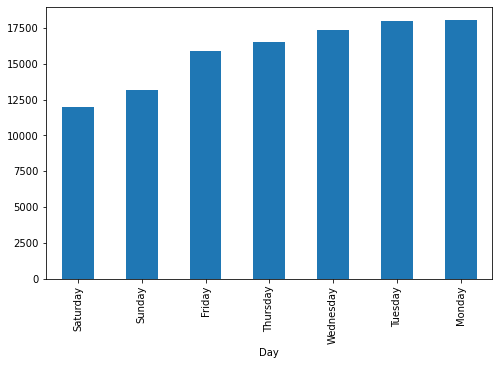

In [9]:
df['Day'] = pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
df.groupby('Day').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

**A.: We can see more online shopping happen on weekdays and less on weekends.**

***

### **4. Which are top 10 categories?**

Text(0.5, 1.0, 'Top 10 product category')

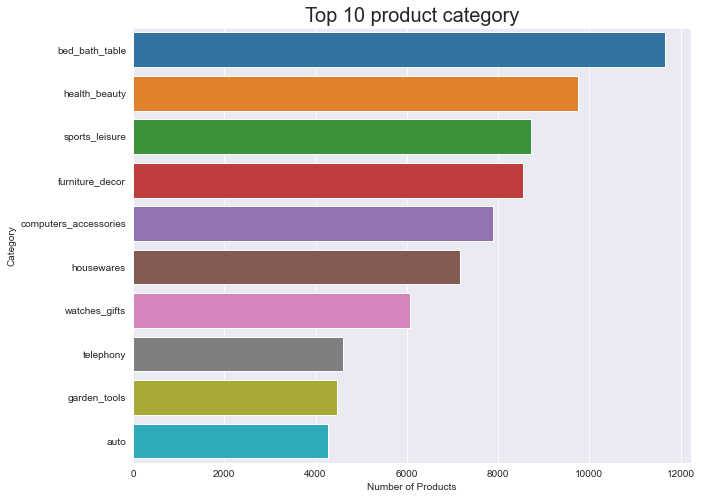

In [10]:
top_10_category = df["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.title('Top 10 product category',fontsize=20)

In [11]:
top_10_category

bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: product_category_name_english, dtype: int64

**A.: Bed_bath_table category is the top selling category.**

----

### **5. What is average price on each product category?**

Text(0.5, 1.0, 'average_price')

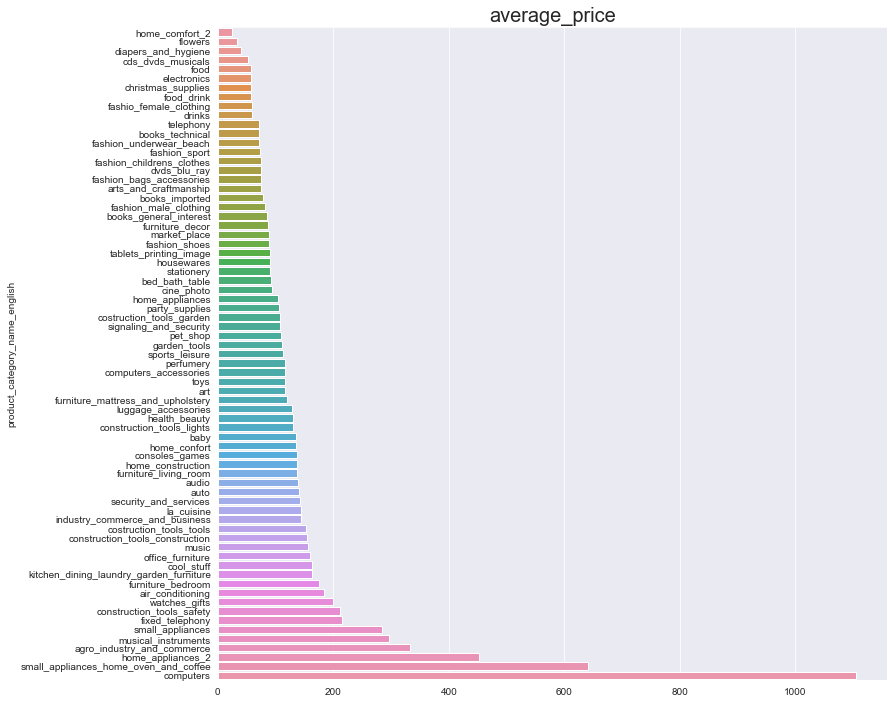

In [12]:
average_price = df.groupby("product_category_name_english")["price"].agg(np.mean).sort_values()
average_price 
fig=plt.figure(figsize=(12,12))
sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('average_price',fontsize=20)

In [13]:
average_price 

product_category_name_english
home_comfort_2                             24.940968
flowers                                    33.637576
diapers_and_hygiene                        40.561892
cds_dvds_musicals                          52.142857
food                                       57.198408
                                            ...     
musical_instruments                       296.108561
agro_industry_and_commerce                332.835691
home_appliances_2                         451.729962
small_appliances_home_oven_and_coffee     641.194133
computers                                1104.317685
Name: price, Length: 71, dtype: float64

**A.: Average price per category is highest for computers.**

----

### **6. What is average price of top 10 categories?**

In [14]:
#(Price * number of products) / number of products
top_category = df[df['product_category_name_english'].isin(top_10_category.index)]
price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False), 2)
price_top_category

product_category_name_english
watches_gifts            200.09
auto                     140.76
health_beauty            130.25
computers_accessories    116.35
sports_leisure           113.44
garden_tools             110.30
bed_bath_table            92.53
housewares                90.38
furniture_decor           87.19
telephony                 70.73
Name: price, dtype: float64

Text(0.5, 1.0, 'average_price')

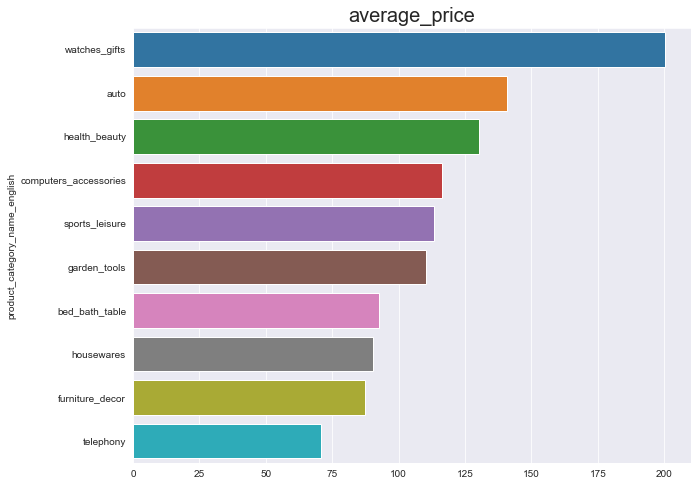

In [16]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=price_top_category.index, x=price_top_category.values)
plt.title('average_price',fontsize=20)

**A. : Watches and gifts is the top product with highest average price**

----

### **7. How many payment methods are available? and which one is the most popular?**

In [17]:
df.payment_type.head()

0    credit_card
1        voucher
2        voucher
3    credit_card
4    credit_card
Name: payment_type, dtype: object

In [18]:
df.payment_type.nunique()

4

In [19]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

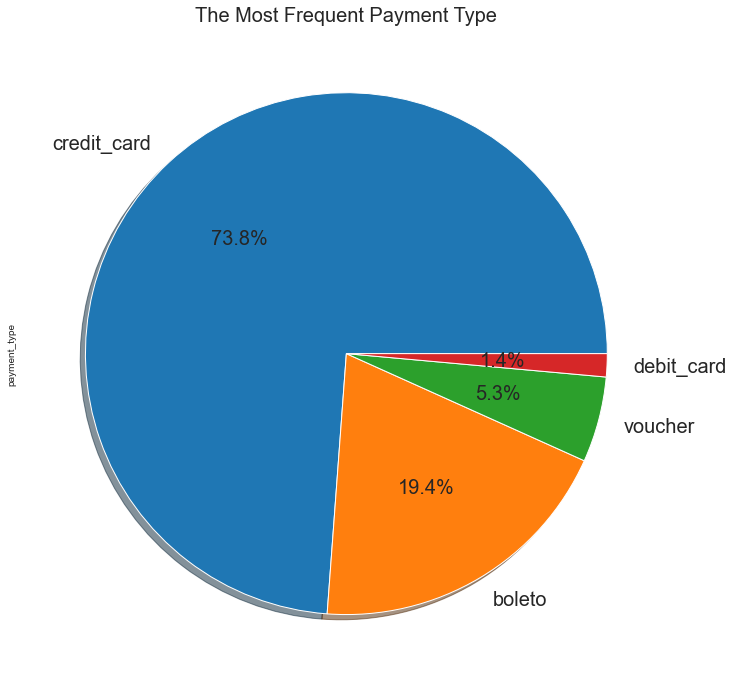

In [20]:
df["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

<AxesSubplot:xlabel='Year,payment_type'>

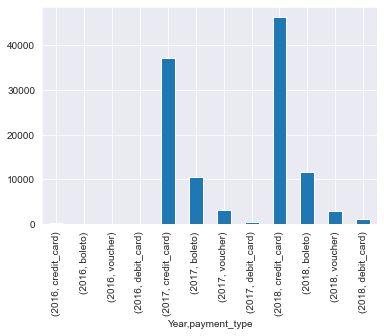

In [21]:
df.groupby("Year")['payment_type'].value_counts().plot(kind='bar')

**A. There are 4 payment types in Brazil with Credit Card solely account of 75 % and it is the most common payment method.**


----

### **8. How customers are distributed over the states?**

In [22]:
top_states = df["customer_state"].value_counts()
top_states

SP    47819
RJ    14648
MG    13230
RS     6282
PR     5790
SC     4161
BA     3858
DF     2389
GO     2319
ES     2288
PE     1803
CE     1482
PA     1070
MT     1067
MS      826
MA      808
PB      614
RN      555
PI      546
AL      437
SE      384
TO      330
RO      275
AM      167
AC       92
AP       83
RR       44
Name: customer_state, dtype: int64

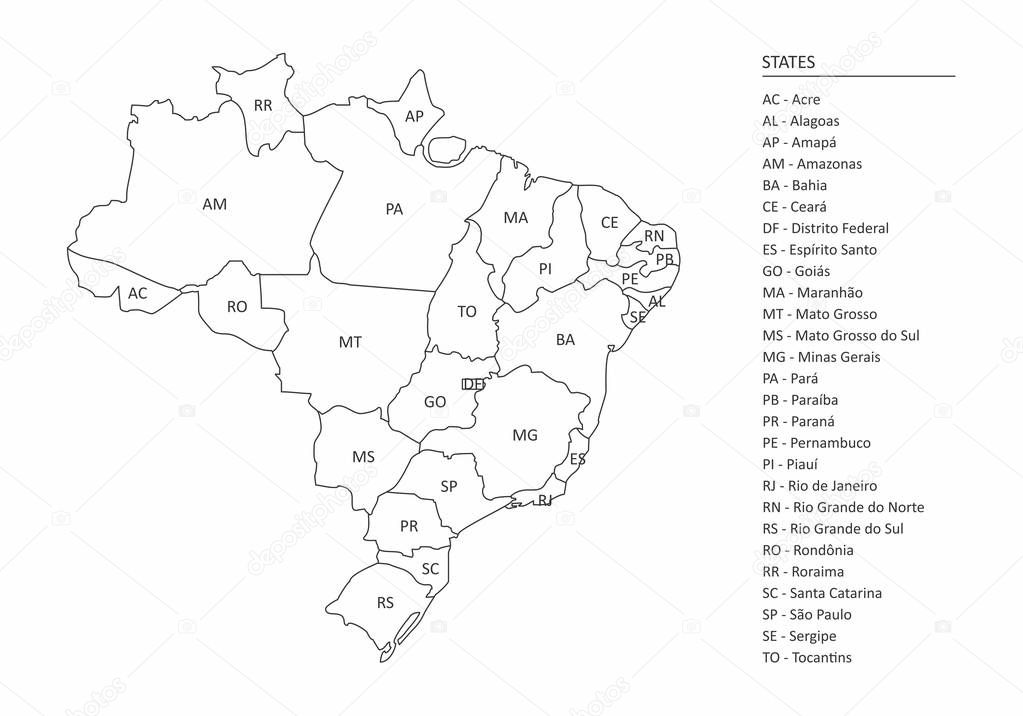

In [23]:
from PIL import Image
img = Image.open('Brazil States.jpg')
img

Text(0.5, 1.0, 'states')

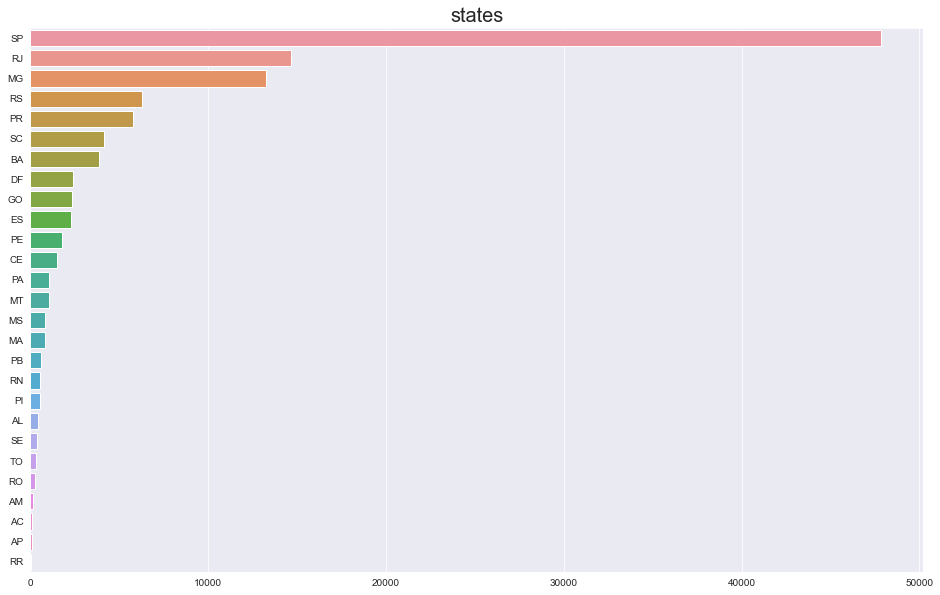

In [25]:
fig=plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('states',fontsize=20)

**A. : Most customers are from Sao Paulo, followed by Rio de Janeiro.**

----

### **9 . Which state has longest & shortest delivery time?**

<AxesSubplot:xlabel='customer_state'>

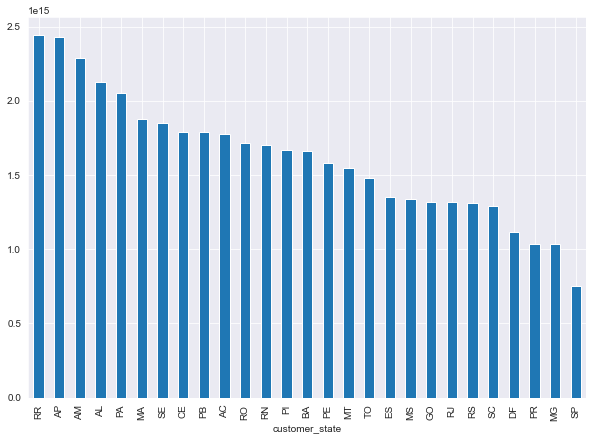

In [26]:
df['delivery_time'] = df['order_delivered_customer_date'].astype(np.int64)- df['order_purchase_timestamp'].astype(np.int64)

delivery_per_state = df.groupby("customer_state")['delivery_time'].mean().sort_values(ascending=False)
delivery_per_state.plot(
    kind='bar',
    figsize=(10,7)
)

**A.: The longest and shortest delivery time belongs to the State of Roraima(RR) and Sao Paulo(SP).**